In [12]:
#Import libraries

import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from sklearn import preprocessing
plt.rcParams['figure.figsize'] = (20,8)

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
#load images

#Load CSV files
df_train = pd.read_csv('C:/Users/hp/Downloads/train.csv')
df_test = pd.read_csv('C:/Users/hp/Downloads/test.csv')

df_train.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#split independent and depend variable for both X_train, y_train and X_test and y_test
X_train = df_train.drop('label', axis=1).values
Y_train = df_train['label'].values

X_test = df_test.drop('label', axis=1).values
Y_test = df_test['label'].values




In [16]:
#check the shape of both X_train, y_train and X_test and y_test
#reshape size

print(X_train.shape)


(22046, 2500)


Parasitized


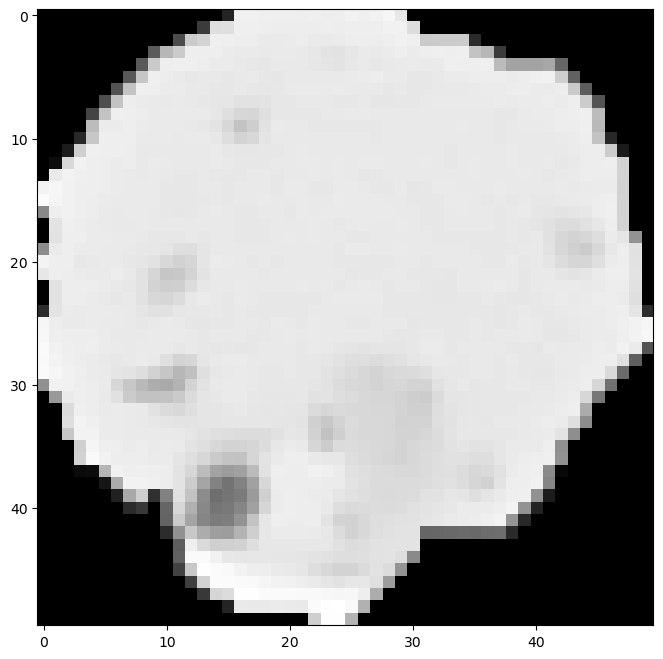

In [17]:
#visualize an image from X_train at any index to understand it. AS the ata given is in csv, reshape the image in 50*50

#a = 200
plt.imshow(X_train[200].reshape(50, 50), cmap='gray')
print(Y_train[200])

In [37]:
#shape all rows from X_train and X_test to 50*50; 1= greyscale astype(float32)

# Assuming X_train and X_test are Numpy arrays with image data
# Reshape images to 50x50 grayscale and cast to float32

X_train = X_train.reshape(df_train.shape[0], 50,50,1).astype('float32')
X_train = X_train / 255.0
                                                             
X_test = X_test.reshape(df_test.shape[0], 50,50,1).astype('float32')
X_test = X_test / 255.0
                                                          
print("X_train shape ===>", X_train.shape)
print("X_test shape ===>", X_test.shape)

X_train shape ===> (22046, 50, 50, 1)
X_test shape ===> (5512, 50, 50, 1)


In [19]:
#Data preprocesssing
#Convert label column in y_train and y_test using LabelBinarizer() and use to_categorical to convert a class vector (integers) to binary class matrix

lb = LabelBinarizer()
y_train_binary = lb.fit_transform(Y_train)
y_test_binary = lb.transform(Y_test)

# Convert binary class matrix to categorical using to_categorical
num_classes = len(lb.classes_)
y_train_categorical = to_categorical(y_train_binary, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_binary, num_classes=num_classes)


In [21]:
#check shape of X_train and y_train
print(X_train.shape)
print(y_train_categorical.shape)

(22046, 50, 50, 1)
(22046, 2)


In [39]:
#Build CNN model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout

img_size = 50
#batch_size = 32

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape= (img_size,img_size,1), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same')) 
model.add(MaxPooling2D())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 64)        

In [40]:
#Compile CNN model


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
#Fit CNN model

# Fit the model to the training data
model.fit(X_train, y_train_categorical,batch_size = 50, epochs=20, verbose= 1)

Epoch 1/20
441/441 [==============================] - 30s 65ms/step - loss: 0.6933 - accuracy: 0.5006
Epoch 2/20
441/441 [==============================] - 29s 67ms/step - loss: 0.6932 - accuracy: 0.4982
Epoch 3/20
441/441 [==============================] - 30s 68ms/step - loss: 0.6933 - accuracy: 0.4963
Epoch 4/20
441/441 [==============================] - 30s 68ms/step - loss: 0.6932 - accuracy: 0.5003
Epoch 5/20
441/441 [==============================] - 31s 70ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 6/20
441/441 [==============================] - 31s 71ms/step - loss: 0.6932 - accuracy: 0.4898
Epoch 7/20
441/441 [==============================] - 33s 74ms/step - loss: 0.6932 - accuracy: 0.4942
Epoch 8/20
441/441 [==============================] - 31s 71ms/step - loss: 0.6932 - accuracy: 0.4917
Epoch 9/20
441/441 [==============================] - 36s 82ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 10/20
441/441 [==============================] - 33s 75ms/step - loss: 0.693

Parasitized
1/1 [==============================] - 0s 176ms/step
Predicted classes: [[0.5004882 0.4995118]]


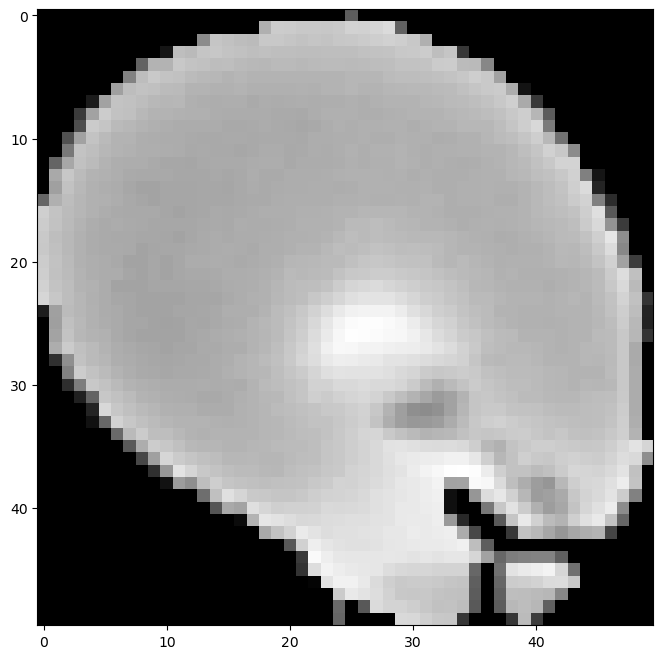

In [42]:
#Evaluate the built CNN model with an image by suing a index varible.

plt.imshow(X_test[200].reshape(50, 50), cmap='gray')
print(Y_test[200])

print('Predicted classes:', model.predict(np.array([X_test[200]])))